In [2]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
#reading in data
data = pd.read_excel('AirQualityUCI.xlsx')

In [4]:
#checking out data
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
#cleaning up header names so they are more readable
new_col_names = ['Date', 'Time', 'CO (mg/m^3), True HA', 'Tin oxide, HA', 'NMHC, True HA', 'Benzene (micromg/m^3), True HA', 'Titania, HA', 'NOx (ppb), True HA', 'Tungsten oxide, HA, nom NOx targeted','NO2 (micromg/m^3), True HA' ,'Tungsten oxide, HA, nom NO2 targeted','Indium oxide, HA', 'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']
data.columns = new_col_names

#checking data for new col names
data.head()



,Date,Time,"CO (mg/m^3), True HA","Tin oxide, HA","NMHC, True HA","Benzene (micromg/m^3), True HA","Titania, HA","NOx (ppb), True HA","Tungsten oxide, HA, nom NOx targeted","NO2 (micromg/m^3), True HA","Tungsten oxide, HA, nom NO2 targeted","Indium oxide, HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [36]:
#Preliminary analysis of NOx
small_df = data[['NOx (ppb), True HA', 'NO2 (micromg/m^3), True HA','Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']]

#checking
small_df.head()

,"NOx (ppb), True HA","NO2 (micromg/m^3), True HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,166.0,113.0,13.60,48.875001,0.757754
1,103.0,92.0,13.30,47.700000,0.725487
2,131.0,114.0,11.90,53.975000,0.750239
3,172.0,122.0,11.00,60.000000,0.786713
4,131.0,116.0,11.15,59.575001,0.788794


In [37]:
#checking shape
small_df.shape

(9357, 5)

In [38]:
#from dataset info: missing values represented by -200
#Removing -200 values
#listing out col names
col_names = ['NOx (ppb), True HA','NO2 (micromg/m^3), True HA', 'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']

#creating loop to drop rows with -200
for col in col_names:
    small_df = small_df[small_df[col] != -200]

#checking shape of ending dataset
small_df.shape

(7393, 5)

In [39]:
#splitting into data and labels
x = small_df[['Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity', 'NO2 (micromg/m^3), True HA']]
y = small_df['NOx (ppb), True HA']

In [40]:
#splitting into testing and training set
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(x, y)

In [41]:
#Trying Linear Regression first
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [42]:
#fitting model to training data and labels
lr_model.fit(train_data, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#making predictions on test data
predictions = lr_model.predict(test_data)

In [44]:
#assessing model performance
from sklearn.metrics import r2_score
import  matplotlib.pyplot as plt

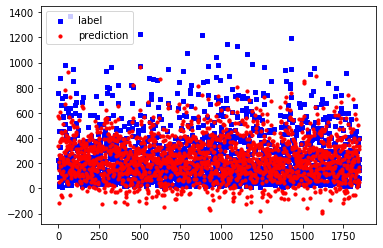

In [45]:
x1 = range(len(test_label))
x2 = range(len(predictions))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x1, test_label, s=10, c='b', marker="s", label='label')
ax.scatter(x2,predictions, s=10, c='r', marker="o", label='prediction')
plt.legend(loc='upper left');
plt.show()

In [34]:
print(r2_score(test_label, predictions))

0.6477540406973262


In [47]:
#This model is a decent predictor but it obviously has some problems
#Trying KNN
from sklearn.neighbors import KNeighborsRegressor

In [48]:
KNN_model = KNeighborsRegressor()

In [49]:
#training model
KNN_model.fit(train_data, train_label)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [50]:
#predicting
KNN_pred = KNN_model.predict(test_data)

In [51]:
#model metrics
print(r2_score(test_label, KNN_pred))

0.7407557411360884


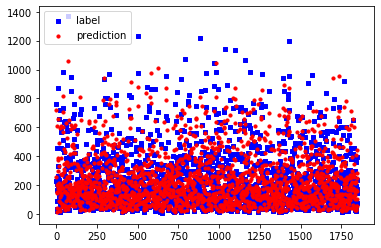

In [52]:
KNN_x2 = range(len(KNN_pred))

fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x1, test_label, s=10, c='b', marker="s", label='label')
ax2.scatter(KNN_x2, KNN_pred, s=10, c='r', marker="o", label='prediction')
plt.legend(loc='upper left');
plt.show()

In [53]:
#KNN is proving to be a much nicer fit
#Trying a SVM
from sklearn.svm import LinearSVR

In [58]:
SVR_model = LinearSVR(max_iter=5000)

In [59]:
#fitting data
SVR_model.fit(train_data, train_label)

/Users/kayladuarte/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=5000,
          random_state=None, tol=0.0001, verbose=0)

In [60]:
#predicting
SVR_pred = SVR_model.predict(test_data)

In [62]:
#model metrics
print(r2_score(test_label, SVR_pred))

0.5903816609870174


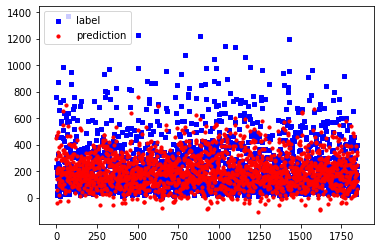

In [61]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x1, test_label, s=10, c='b', marker="s", label='label')
ax2.scatter(x2, SVR_pred, s=10, c='r', marker="o", label='prediction')
plt.legend(loc='upper left');
plt.show()

In [66]:
#SVR is not a very good model for this data
#trying decision tree
from sklearn.tree import DecisionTreeRegressor

In [67]:
tree_model = DecisionTreeRegressor()

In [68]:
#fitting data
tree_model.fit(train_data, train_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
#predicting labels
tree_pred = tree_model.predict(test_data)

In [71]:
#model metrics
print(r2_score(test_label, tree_pred))

0.594986300618065


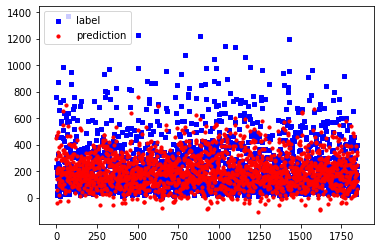

In [72]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x1, test_label, s=10, c='b', marker="s", label='label')
ax2.scatter(x2, SVR_pred, s=10, c='r', marker="o", label='prediction')
plt.legend(loc='upper left');
plt.show()

In [73]:
#After this brief investigation, it seems KNN is the best model to predict NOx based on the chosen parameters, though it is not perfect